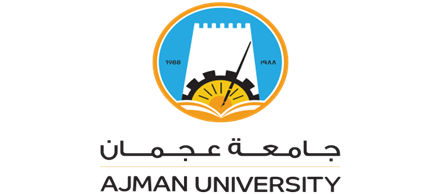



# **New York City Airbnb Price Predicting Analysis**

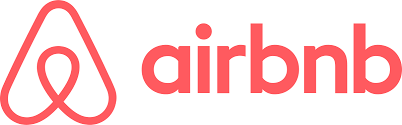

# **Programming for Data Analytics II Course Project**



---


College: Engineering and Information Technology

Department: Information Technology

Program: Data Analytics

Academic semester: Fall 2024- 2025

Supervised by: Dr. Salam Fraihat







### **Team Members:**

Aya AlNajjar  202210912

Sabrin Ibrahim 202111554

## **Introduction**

Airbnb is a San Francisco-based American company that runs an online marketplace for lodging and tourism experiences, focusing on vacation rentals and homestays. Established in 2008, Airbnb operates through its website and mobile app, connecting hosts with guests.

Unlike traditional accommodation providers, Airbnb does not own the properties listed on its platform; instead, it earns revenue through booking commissions.

**Our project goal:-**

Can we estimate the price of an Airbnb listing price through a sequential neural network model based on certain features?

**Our project outcomes:-**

*   Creation of an effective model for estimating Airbnb listing prices.
*   Suggestions for further exploration in pricing dynamics.






**dataset resource:** https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata


# **Learning Algorithm :** *ANN Regression model*


---





# **Import all needed libraries**

In [ ]:
!pip install tensorflow

In [ ]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O

'''Visualization'''
import matplotlib.pyplot as plt    # 2D Plotting Library
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import missingno                   # Visualization of missing data

'''Plotly express Visualizations'''
import plotly.express as px        # Interactive Graphing Library for Python

'''Spatial Visualizations'''
import folium                      # Python library for creating interactive maps
from folium.plugins import HeatMap


'''Machine Learning'''
import sklearn
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf        # Deep learning library
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras import backend as K
from tensorflow.keras.regularizers import l1, l2,l1_l2
from tensorflow.keras.models import load_model

# **DATA PROFILING AND PREPROCESSING**


### understanding our data
*   load dataset
*   observe columns and rows
*   explain every feature
*   show all the unique values for every column


1- loading dataset

In [ ]:
df1=pd.read_csv("/content/Airbnb_Open_Data.csv")
df1

<ipython-input-3-6ff74618b8d5>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("/content/Airbnb_Open_Data.csv")


id                                              NAME  \
0       1001254                Clean & quiet apt home by the park   
1       1002102                             Skylit Midtown Castle   
2       1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3       1002755                                               NaN   
4       1003689  Entire Apt: Spacious Studio/Loft by central park   
...         ...                                               ...   
102594  6092437                        Spare room in Williamsburg   
102595  6092990                     Best Location near Columbia U   
102596  6093542                    Comfy, bright room in Brooklyn   
102597  6094094                  Big Studio-One Stop from Midtown   
102598  6094647                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       80014485718            unconfirmed     Madaline            Brooklyn   
1       52335172823               verified        Jenna           Manhattan   
2       78829239556                    NaN        Elise           Manhattan   
3       85098326012            unconfirmed        Garry            Brooklyn   
4       92037596077               verified       Lyndon           Manhattan   
...             ...                    ...          ...                 ...   
102594  12312296767               verified         Krik            Brooklyn   
102595  77864383453            unconfirmed        Mifan           Manhattan   
102596  69050334417            unconfirmed        Megan            Brooklyn   
102597  11160591270            unconfirmed  Christopher              Queens   
102598  68170633372            unconfirmed      Rebecca           Manhattan   

              neighbourhood       lat      long        country  ...  \
0                Kensington  40.64749 -73.97237  United States  ...   
1                   Midtown  40.75362 -73.98377  United States  ...   
2                    Harlem  40.80902 -73.94190  United States  ...   
3              Clinton Hill  40.68514 -73.95976  United States  ...   
4               East Harlem  40.79851 -73.94399  United States  ...   
...                     ...       ...       ...            ...  ...   
102594         Williamsburg  40.70862 -73.94651  United States  ...   
102595  Morningside Heights  40.80460 -73.96545  United States  ...   
102596           Park Slope  40.67505 -73.98045  United States  ...   
102597     Long Island City  40.74989 -73.93777  United States  ...   
102598      Upper West Side  40.76807 -73.98342  United States  ...   

       service fee minimum nights number of reviews last review  \
0            $193            10.0               9.0  10/19/2021   
1             $28            30.0              45.0   5/21/2022   
2            $124             3.0               0.0         NaN   
3             $74            30.0             270.0    7/5/2019   
4             $41            10.0               9.0  11/19/2018   
...            ...            ...               ...         ...   
102594       $169             1.0               0.0         NaN   
102595       $167             1.0               1.0    7/6/2015   
102596       $198             3.0               0.0         NaN   
102597       $109             2.0               5.0  10/11/2015   
102598       $206             1.0               0.0         NaN   

        reviews per month review rate number calculated host listings count  \
0                    0.21                4.0                            6.0   
1                    0.38                4.0                            2.0   
2                     NaN                5.0                            1.0   
3                    4.64                4.0                            1.0   
4                    0.10                3.0                            1.0   
...                   ...                ...                            ...   
102594                Na

In [ ]:
df1.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [ ]:
df1.tail()

id                              NAME      host id  \
102594  6092437        Spare room in Williamsburg  12312296767   
102595  6092990     Best Location near Columbia U  77864383453   
102596  6093542    Comfy, bright room in Brooklyn  69050334417   
102597  6094094  Big Studio-One Stop from Midtown  11160591270   
102598  6094647              585 sf Luxury Studio  68170633372   

       host_identity_verified    host name neighbourhood group  \
102594               verified         Krik            Brooklyn   
102595            unconfirmed        Mifan           Manhattan   
102596            unconfirmed        Megan            Brooklyn   
102597            unconfirmed  Christopher              Queens   
102598            unconfirmed      Rebecca           Manhattan   

              neighbourhood       lat      long        country  ...  \
102594         Williamsburg  40.70862 -73.94651  United States  ...   
102595  Morningside Heights  40.80460 -73.96545  United States  ...   
102596           Park Slope  40.67505 -73.98045  United States  ...   
102597     Long Island City  40.74989 -73.93777  United States  ...   
102598      Upper West Side  40.76807 -73.98342  United States  ...   

       service fee minimum nights number of reviews last review  \
102594       $169             1.0               0.0         NaN   
102595       $167             1.0               1.0    7/6/2015   
102596       $198             3.0               0.0         NaN   
102597       $109             2.0               5.0  10/11/2015   
102598       $206             1.0               0.0         NaN   

        reviews per month review rate number calculated host listings count  \
102594                NaN                3.0                            1.0   
102595               0.02                2.0                            2.0   
102596                NaN                5.0                            1.0   
102597               0.10                3.0                            1.0   
102598                NaN                3.0                            1.0   

        availability 365                                        house_rules  \
102594             227.0  No Smoking No Parties or Events of any kind Pl...   
102595             395.0  House rules: Guests agree to the following ter...   
102596             342.0                                                NaN   
102597             386.0                                                NaN   
102598              69.0                                                NaN   

       license  
102594     NaN  
102595     NaN  
102596     NaN  
102597     NaN  
102598     NaN  

[5 rows x 26 columns]

In [ ]:
df1.sample(5)

id                                               NAME  \
60722  34538097  The Blue Door | Modern 2 Rooms | Private Entrance   
54575  31143109           Sonder Duane Street | Spacious King Room   
53614  30612348  Luxurious 2 bedroom home close to Airport and ...   
90457  50960737  Lovely room in the lovely area of Williamsburg BK   
32082  18720225                 Chic & Cozy Apartment with Balcony   

           host id host_identity_verified     host name neighbourhood group  \
60722  31086925067               verified       Terrell            Brooklyn   
54575  40440779232                    NaN  Sonder (NYC)           Manhattan   
53614  85584841709            unconfirmed        Farhan              Queens   
90457  47355429072               verified         Freya            Brooklyn   
32082  42559468039            unconfirmed       Tiffany           Manhattan   

       neighbourhood       lat      long        country  ... service fee  \
60722  East New York  40.66827 -73.89174  United States  ...        $30    
54575        Tribeca  40.71532 -74.00850  United States  ...       $201    
53614  East Elmhurst  40.76874 -73.87813  United States  ...       $151    
90457   Williamsburg  40.71385 -73.95559  United States  ...       $221    
32082         Harlem  40.80670 -73.94481  United States  ...        $40    

      minimum nights number of reviews last review  reviews per month  \
60722            2.0              19.0  12/20/2021               1.93   
54575            2.0               1.0   2/13/2022               1.00   
53614            1.0             380.0   2/16/2022               8.27   
90457            2.0               3.0    1/2/2017               0.10   
32082            2.0               8.0    1/1/2019               0.59   

      review rate number calculated host listings count  availability 365  \
60722                2.0                            1.0              84.0   
54575                5.0                           54.0             289.0   
53614                3.0                            3.0               4.0   
90457                5.0                            1.0               0.0   
32082                5.0                            1.0              35.0   

                                             house_rules license  
60722                                                NaN     NaN  
54575                                                NaN     NaN  
53614                                                NaN     NaN  
90457                                                NaN     NaN  
32082  We except you to clean up after yourself and g...     NaN  

[5 rows x 26 columns]

2- observing columns and rows

In [ ]:
df1.shape

(102599, 26)

the dataset contains 102599 rows and 26 columns

In [ ]:
df1.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                        object
license                            object
dtype: object

In [ ]:
len(df1.columns)

26

In this dataset we have multiples types of data and knowing the data types in our dataset is important becouse it helps us know if our dataset is accurate, efficiently stored, and can be properly analyzed , different data types will be handeled differently.

*  **price** is identified as an object rather than an int
*  **service fee** is identified as an object rather than int
*  **Construction year** is identified as a float rather than an int
*  **last review** is identified as an object rather than datetime object
*  **availability 365** is identified as an float rather than an int
*  **minimum nights** is identified as a float rather than an int
*  **number of reviews** is identified as a float rather than an int
*   **review rate number** is identified as a float rather than an int
*  **calculated host listings count** is identified as a float rather than an int


In [ ]:
df1.describe()

id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year  minimum nights  number of reviews  \
count      102385.000000   102190.000000      102416.000000   
mean         2012.487464        8.135845          27.483743   
std             5.765556       30.553781          49.508954   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000           1.000000   
50%          2012.000000        3.000000           7.000000   
75%          2017.000000        5.000000          30.000000   
max          2022.000000     5645.000000        1024.000000   

       reviews per month  review rate number  calculated host listings count  \
count       86720.000000       102273.000000                   102280.000000   
mean            1.374022            3.279106                        7.936605   
std             1.746621            1.284657                       32.218780   
min             0.010000            1.000000                        1.000000   
25%             0.220000            2.000000                        1.000000   
50%             0.740000            3.000000                        1.000000   
75%             2.000000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   

       availability 365  
count     102151.000000  
mean         141.133254  
std          135.435024  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          269.000000  
max         3677.000000

The statistical analysis of our dataset makes it obvious that there is a significant number of outliers, which might impact the statistical summary,therefore we will have to remove the unwanted data.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

3- explaining every feature in our dataset

*   **ID:** unique identifier for the listing.

*   **NAME:** Name of the listing.

*   **HOST ID:** unique identifier for the host of the Airbnb listing

*   **HOST IDENTITY VAREFIED:** confirms whether the host's identity is varified or not.

*   **HOST NAME:** The name of the host who owns the Airbnb listing.

*   **NEIGHBOURHOOD GROUP:** A broader geographical area or group to which a neighborhood belongs.

*   **NEIGHBOURHOOD:** The neighborhood where the Airbnb property is located. It provides information about the property's location within a city or region.

*  **LAT & LONG**: These are geographic coordinates that use the World Geodetic System projection. They provide the precise location of the Airbnb property on the Earth's surface.

*   **INSTANT BOOKABLE:** Whether the guest can automatically book the listing without the host requiring to accept their request.

*   **CANCELLATION POLICY:** tells us if the cancellation policy is (strict, moderate, etc...).

*   **ROOM TYPE:** The type of room booked by the customer for their stay (e.g., entire home/apartment, private room, shared room). It describes the accommodation type.

*  **CONSTRUCTION YEAR:** it tells us what year the property was built.

*   **PRICE:** The price of the booking for the Airbnb listing. It indicates the cost of renting the property for a particular period.

*   **SERVICE FEE:** tells us how much the service fee is.

*   **MINIMUM NIGHTS:** minimum number of nights allowed for each airbnb reservation.

*   **NUMBER OF REVIEWS:** total number of reviews for each airbnb.

*   **LAST REVIEW:** The date of the last/newest review.

*   **REVIEWS PER MONTH:** The average number of reviews that each listing receives per month.

*   **REVIEW RATE NUMBER:** the rating of the review.

*   **CALCULATED HOST LISTING COUNT:** the total number of listings a host has, counting all their properties listed on Airbnb.

*   **AVAILABILITY 365:** the days the airbnb is available for booking throughtout the year.

*   **HOUSE RULES:** rules set by the host for each listing.

*   **LICENSE:** license/permit/registration number.

4- identify the unique values for the relevent columns in our dataset to help us deal with null values in the next step

In [ ]:
df1['host_identity_verified'].unique()

array(['unconfirmed', 'verified', nan], dtype=object)

In [ ]:
df1['host name'].unique()

array(['Madaline', 'Jenna', 'Elise', ..., 'Anna B', 'Natalie And Dan',
       'Apostle John'], dtype=object)

In [ ]:
df1['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [ ]:
df1['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
df1['country'].unique()

array(['United States', nan], dtype=object)

In [ ]:
df1['country code'].unique()

array(['US', nan], dtype=object)

In [ ]:
df1['instant_bookable'].unique()

array([False, True, nan], dtype=object)

In [ ]:
df1['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [ ]:
df1['room type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [ ]:
df1['Construction year'].unique()

array([2020., 2007., 2005., 2009., 2013., 2015., 2004., 2008., 2010.,
       2019., 2018., 2006., 2016., 2017., 2021., 2003., 2011., 2012.,
       2022., 2014.,   nan])

In [ ]:
df1['review rate number'].unique()

array([ 4.,  5.,  3., nan,  2.,  1.])

We can conclude from checking the unique values in our features that most of our features have null values.

lets explore more methods and tools for handling null values.

# **DATA CLEANING**


*   Remove Duplicates
*   Fill in missing data
*   Drop unwanted columns
*   Check for outliers




1- Removing Duplicates

is there any duplicates in the dataset?

In [ ]:
df1.duplicated().any()

True

In [ ]:
df1.duplicated().sum()

541

we will drop all the duplicated rows since they do not add any information to my dataset

In [ ]:
# our datasets size before dropping any columns
df1.shape

(102599, 26)

In [ ]:
df1 = df1.drop_duplicates()

In [ ]:
# our datasets size after dropping the duplicated columns
df1.shape

(102058, 26)

In [ ]:
df1.duplicated().any()

False

2- Fill in missing data

Replacing nulls can impact statistical analyses. we should be mindful on how this change might affect the results and data.

In [ ]:
df1.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules                        51842
license                           102056
dtype: int64

We have null values in all columns except in "id", " host id" and " room type "

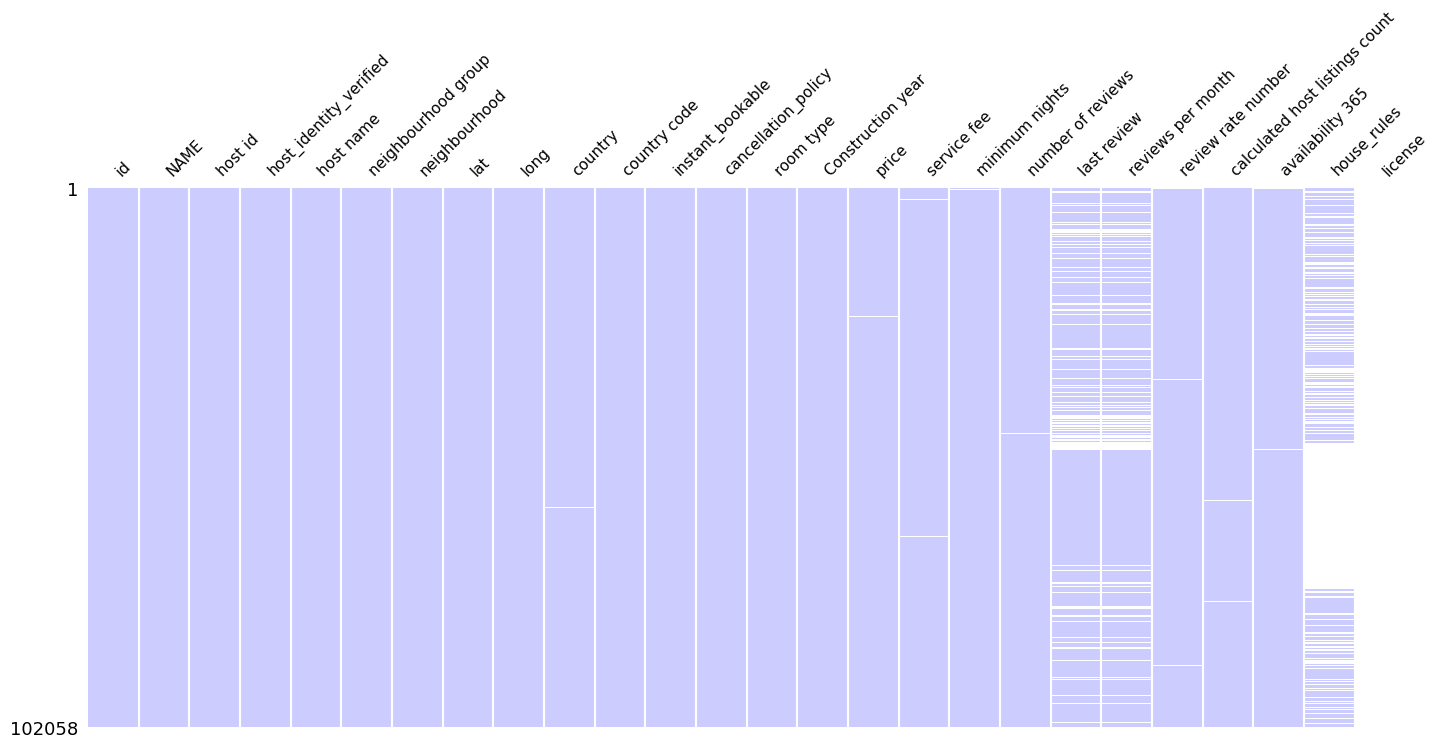

In [ ]:
missingno.matrix(df1, sparkline=False, figsize=(17,7), fontsize=11, color=(0.8, 0.8, 1.0));

*   a visual representation of how our data looks like with all the missing/null values
*   **last review** and **review per month** have equal number of nulls
*   we can conclude the the column **license** is empty and that it needs to be dropped, so it wont take up space in the memory and cause curse of dimensionality
*   **house rules** is also a column that is less than half empty but it cant be dropped beacuse dropping it will cause us to lose the rest of the important data in the column


In [ ]:
df1['country'] = df1['country'].fillna('United States')

<ipython-input-31-fafe032c6764>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['country'] = df1['country'].fillna('United States')


In [ ]:
#the unique values after filling the null values
df1['country'].unique()

array(['United States'], dtype=object)

In [ ]:
df1['country code'] = df1['country code'].fillna('US')

<ipython-input-33-8e3a0a51cfb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['country code'] = df1['country code'].fillna('US')


In [ ]:
df1['country code'].unique()

array(['US'], dtype=object)

The null was filled with "united states" and "US" beacuse the data is based in the US

In [ ]:
df1['neighbourhood group'] = df1['neighbourhood group'].fillna('Somewhere')

<ipython-input-35-d673c5986bd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['neighbourhood group'] = df1['neighbourhood group'].fillna('Somewhere')


this 'neighbourhood group' column contains misspelled group names thats creating extra unique values, therefore we'll be renaming them

In [ ]:
df1.replace({"neighbourhood group" : {"manhatan" : "Manhattan",
                                  "Manhattan" : "Manhattan",
                                  "Brooklyn" : "Brooklyn",
                                  "brookln" : "Brooklyn",
                                  "Somewhere" : "Staten Island"}},
                                  inplace = True)

<ipython-input-36-f60eed54ca1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({"neighbourhood group" : {"manhatan" : "Manhattan",


In [ ]:
df1['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
pastel_colors = ['#FFB6C1', '#87CEFA', '#98FB98', '#B19CD9', '#FFDAB9']

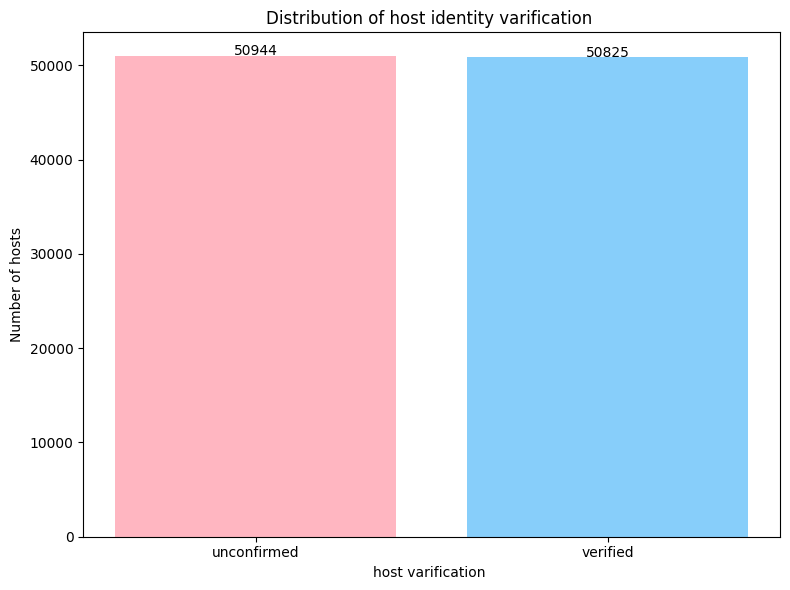

In [ ]:
neighborhood_counts = df1['host_identity_verified'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(neighborhood_counts.index, neighborhood_counts.values, color=pastel_colors)
plt.title('Distribution of host identity varification ')
plt.xlabel('host varification ')
plt.ylabel('Number of hosts')

for i, v in enumerate(neighborhood_counts.values):
    ax.text(i, v + 100, str(v), ha='center', fontsize=10)
plt.tight_layout()
plt.show()

For host verification, since the bar chart shows that the number of host verifications is nearly equivalent, assigning missing values to a neutral category like 'Unconfirmed' is a fair solution. By doing this, the distribution balance remains intact and bias that would result from giving one existing category a high percentage of missing values is avoided.



In [ ]:
df1['host_identity_verified'] = df1['host_identity_verified'].fillna('unconfirmed')

<ipython-input-40-5fdc47de0464>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_identity_verified'] = df1['host_identity_verified'].fillna('unconfirmed')


In [ ]:
df1['host_identity_verified'].unique()

array(['unconfirmed', 'verified'], dtype=object)

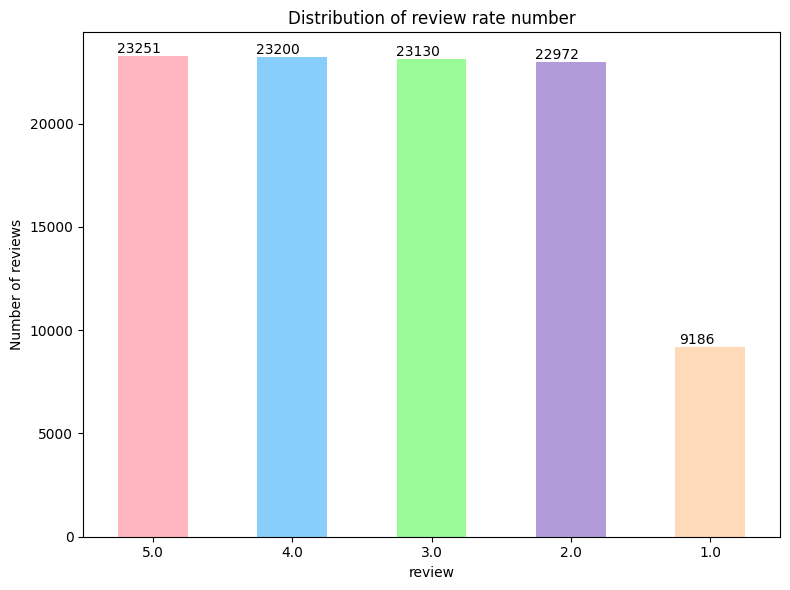

In [ ]:
rrn = df1['review rate number'].value_counts()

plt.figure(figsize=(8, 6))
bars = rrn.plot(kind='bar', color=pastel_colors)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.3,
             f'{int(bar.get_height())}', ha='center', va='bottom', color='black')

plt.title('Distribution of review rate number')
plt.xlabel('review')
plt.ylabel('Number of reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

For the review rate number, the review value of 1 is the least recorded, therefore we are replacing the nulls to 1. To ensure data consistency, we decided to assign null values for rate 1, which has the lowest count rate; this has no effect on all other rates.

In [ ]:
fill_value =1.0
df1['review rate number']=df1['review rate number'].fillna(fill_value)

<ipython-input-43-0b560bb39dae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review rate number']=df1['review rate number'].fillna(fill_value)


In [ ]:
df1['review rate number'].unique()

array([4., 5., 3., 1., 2.])

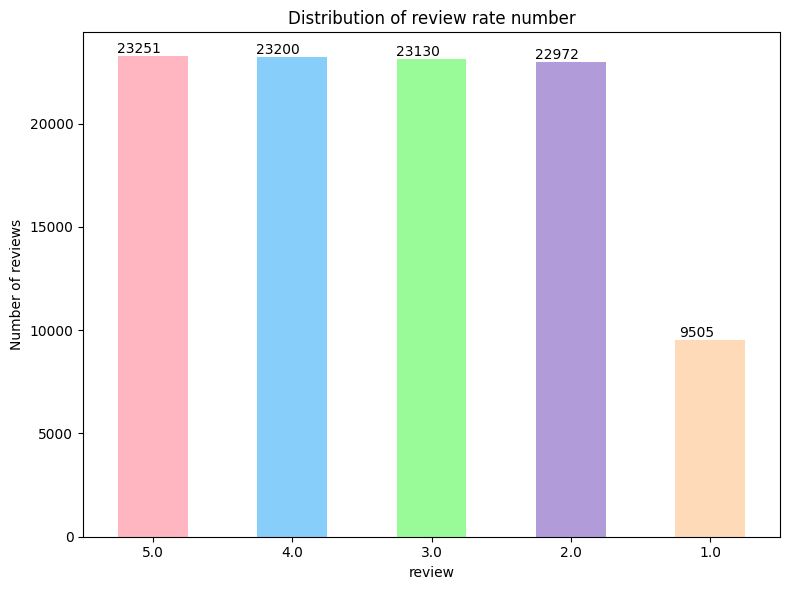

In [ ]:
rrn = df1['review rate number'].value_counts()

plt.figure(figsize=(8, 6))
bars = rrn.plot(kind='bar', color=pastel_colors)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.3,
             f'{int(bar.get_height())}', ha='center', va='bottom', color='black')

plt.title('Distribution of review rate number')
plt.xlabel('review')
plt.ylabel('Number of reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

We can see that the overall distribution was not affected, therefore the results wont be misleading.

In [ ]:
mean_coords = df1.groupby('neighbourhood')[['lat', 'long']].mean()

df1 = df1.set_index('neighbourhood')
df1['lat'].fillna(mean_coords['lat'], inplace=True)
df1['long'].fillna(mean_coords['long'], inplace=True)
df1.reset_index(inplace=True)

<ipython-input-46-19d4ee42a31f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['lat'].fillna(mean_coords['lat'], inplace=True)
<ipython-input-46-19d4ee42a31f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

as for the lan and long attributes, we are filling the few null values by the average of each column. In this way the new data will remain in the accurate range.

instant_bookable
False    51186
True     50767
Name: count, dtype: int64


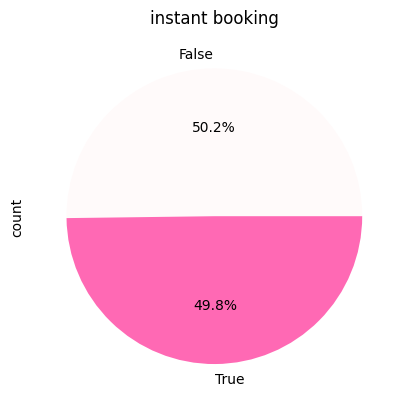

In [ ]:
colors = ['snow', 'hotpink']
df1['instant_bookable'].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('instant booking')
print(df1['instant_bookable'].value_counts())

plt.show()

In [ ]:
fill_value =False
df1['instant_bookable']=df1['instant_bookable'].fillna(fill_value)

<ipython-input-48-f81394a5975b>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable']=df1['instant_bookable'].fillna(fill_value)


In [ ]:
df1['instant_bookable'].unique()

array([False,  True])

instant_bookable
False    51291
True     50767
Name: count, dtype: int64


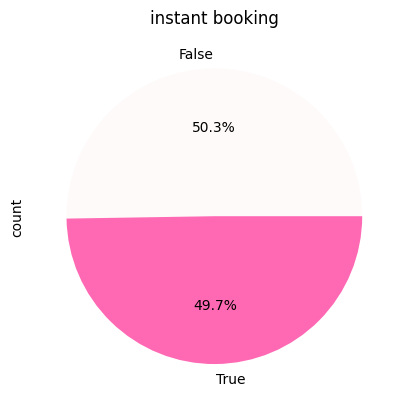

In [ ]:
colors = ['snow', 'hotpink']
df1['instant_bookable'].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('instant booking')
print(df1['instant_bookable'].value_counts())

plt.show()

for instant booking, given that 'True' might imply confirmation or validation, assigning 'False' ensures the null values are treated as unconfirmed or absent information. This maintains the validity of the analysis on the data by preventing incorrect readings while keeping the data distribution in sync alongside its original structure.

In [ ]:
fill_value ='moderate'
df1['cancellation_policy']=df1['cancellation_policy'].fillna(fill_value)

In [ ]:
df1['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

For cancellation_policy we used 'moderate' for maintaining a balance between flexibility and restriction in cancellation policies.

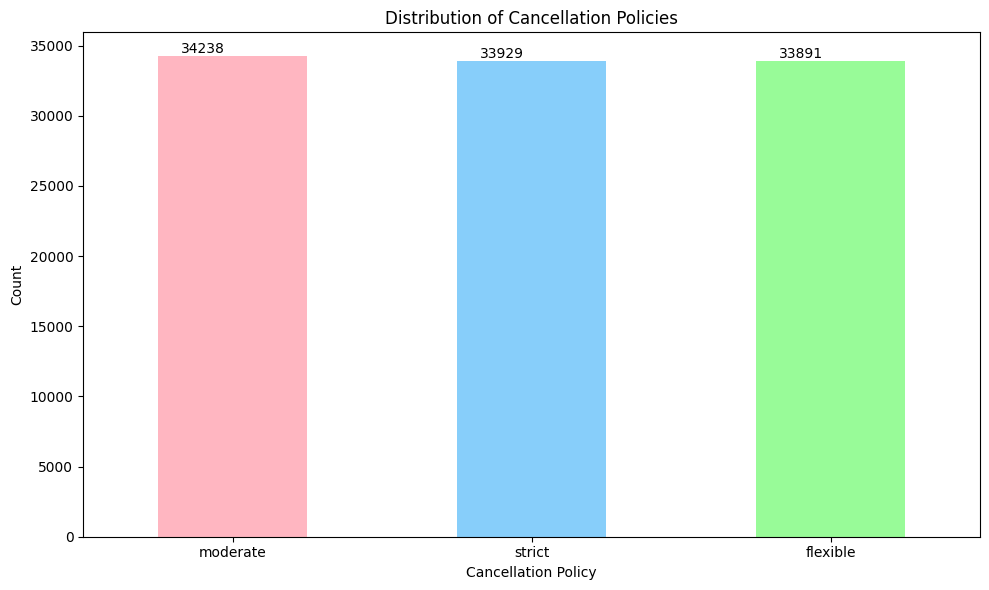

In [ ]:
policy_counts = df1['cancellation_policy'].value_counts()

plt.figure(figsize=(10, 6))
bars = policy_counts.plot(kind='bar', color=pastel_colors)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.3,
             f'{int(bar.get_height())}', ha='center', va='bottom', color='black')

plt.title('Distribution of Cancellation Policies')
plt.xlabel('Cancellation Policy')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Since 'moderate' is considered the mean value, we replaced nulls with it

In [ ]:
df1['price'] = df1['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [ ]:
df1['service fee'] = df1['service fee'].str.replace('$', '').str.replace(',', '').astype(float)

To be able to perform calculation of the attributes price and service fee, we changed their data type to float instead of object and we removed the attached symbols, getting rid of $


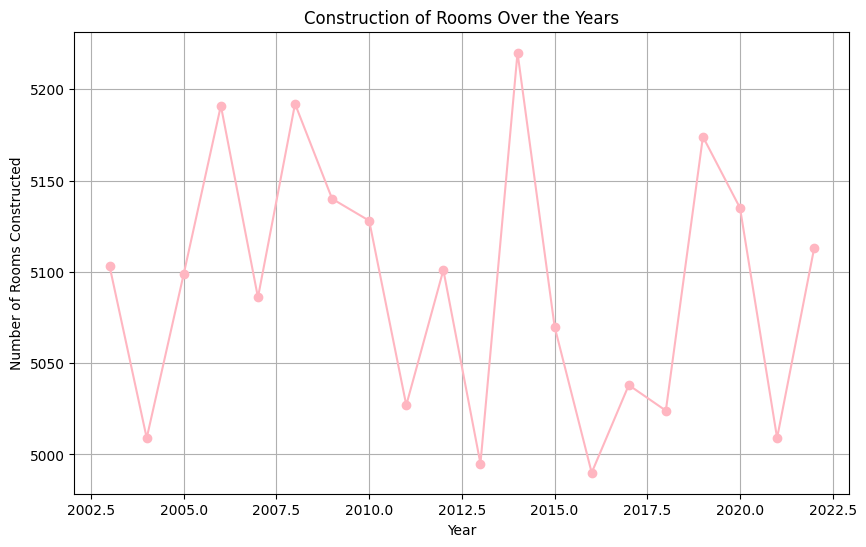

In [ ]:
construction_year_counts = df1['Construction year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
construction_year_counts.plot(kind='line', marker='o', color=pastel_colors)
plt.title('Construction of Rooms Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Rooms Constructed')
plt.grid(True)
plt.show()

Choosing our own value for the nulls changed the whole conclusion so we will be using another method to obtain correct values

In [ ]:
num_columns = ['price','service fee','minimum nights', 'number of reviews',
                     'reviews per month', 'review rate number','Construction year', 'calculated host listings count',
                     'availability 365']
for i in num_columns:
    df1[i].fillna(df1[i].median(), inplace=True)

<ipython-input-57-d2ac40b446bb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[i].fillna(df1[i].median(), inplace=True)


For the remaining numerical columns, we are choosing the median values to fill the nulls by.

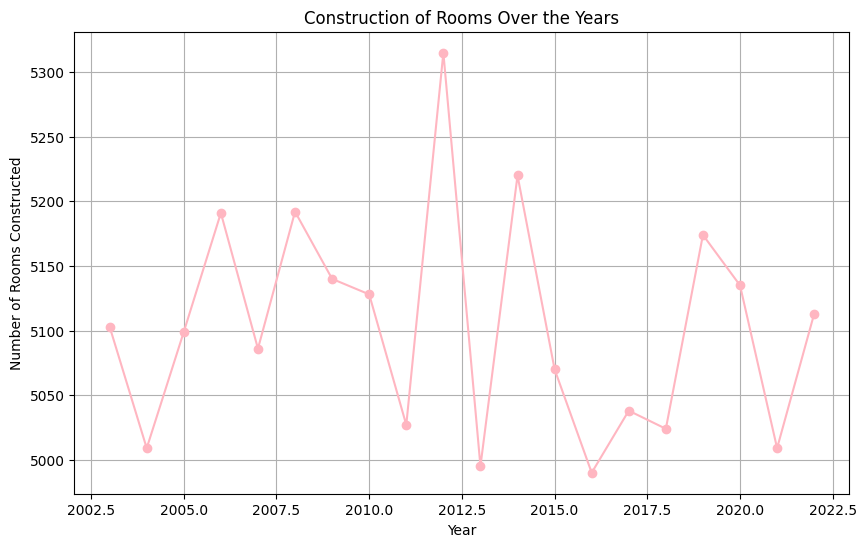

In [ ]:
construction_year_counts = df1['Construction year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
construction_year_counts.plot(kind='line', marker='o', color=pastel_colors)
plt.title('Construction of Rooms Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Rooms Constructed')
plt.grid(True)
plt.show()

Although there is a slight change in the distribution, We obtained better results by using the median year.

In [ ]:
df1.fillna({'last review':"NotReviewed"}, inplace=True)
df1.fillna({'NAME':"NoName"}, inplace=True)
df1.fillna({'host name':"NoName"}, inplace=True)
df1.fillna({'neighbourhood':"unKnown"}, inplace=True)

filling the remaining **categorical** columns with the value unknown since we cannot create new values for them.

In [ ]:
df1.isnull().sum()

neighbourhood                          0
id                                     0
NAME                                   0
host id                                0
host_identity_verified                 0
host name                              0
neighbourhood group                    0
lat                                    0
long                                   0
country                                0
country code                           0
instant_bookable                       0
cancellation_policy                    0
room type                              0
Construction year                      0
price                                  0
service fee                            0
minimum nights                         0
number of reviews                      0
last review                            0
reviews per month                      0
review rate number                     0
calculated host listings count         0
availability 365                       0
house_rules                        51842
license                           102056
dtype: int64

As a result of all the filling in work, we now have a full dataset without any missing values or lost records

3- Drop unwanted columns

In [ ]:
df1 = df1.drop(['id','license','country','country code','host id','house_rules','last review','NAME','host name'], axis=1)

we dropped the unnecessary columns that are either unique for all (have redundancy like: country and country code), irrelevant columns to the analysis or decision-making process(like: host name),or without any data(like: license), and to avoid overfitting to our model we had to drop columns so the model does not learn noise details that hold no meaning or value(like: id and host id).

This step guarantees that we only use the most relevant and insightful data for analysis.

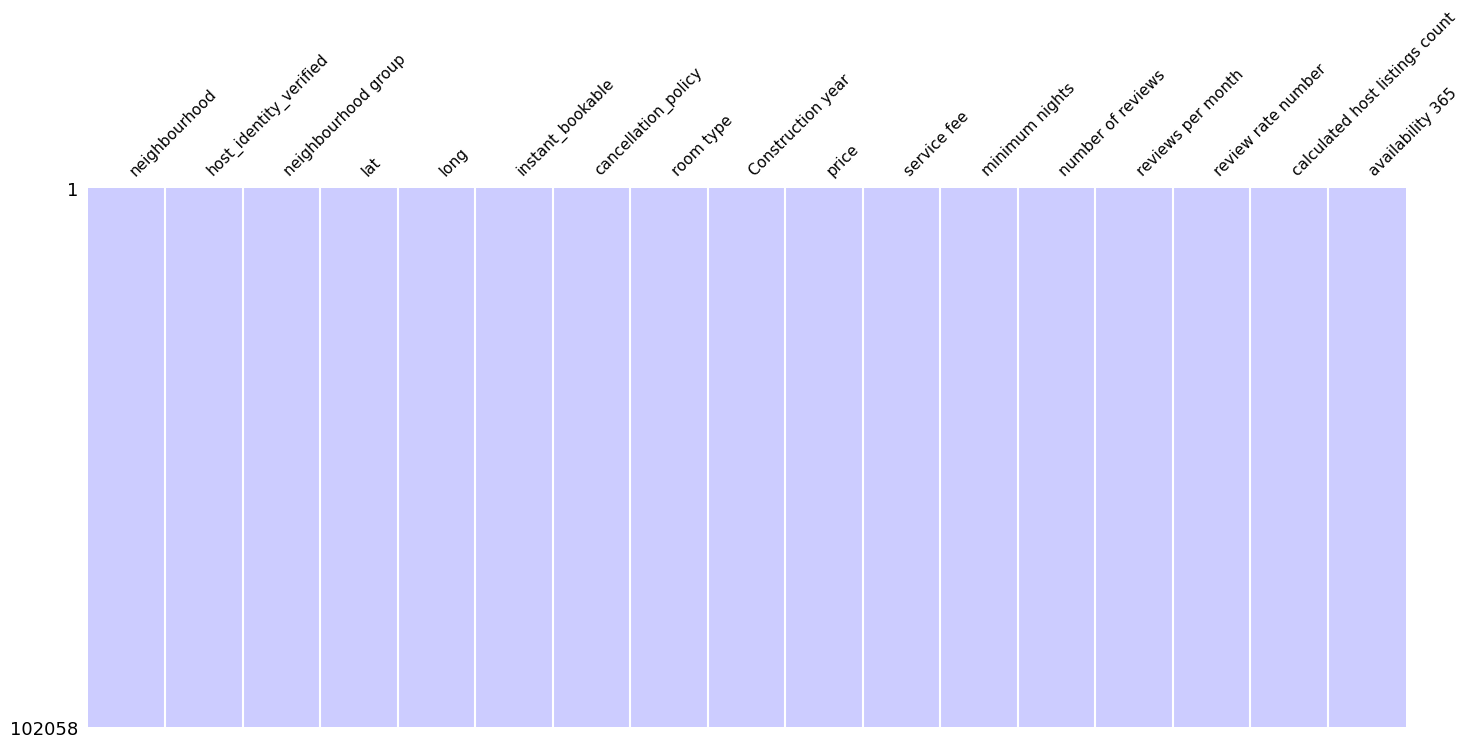

In [ ]:
missingno.matrix(df1, sparkline=False, figsize=(17,7), fontsize=11, color=(0.8, 0.8, 1.0));

Checking our resulting data again using the missing no matrix to get a better overview, as for the rules column,we do not need to fill it or delete it as we will be using it in the future.

4- Checking for outlires

 looking for outliers in numeric columns

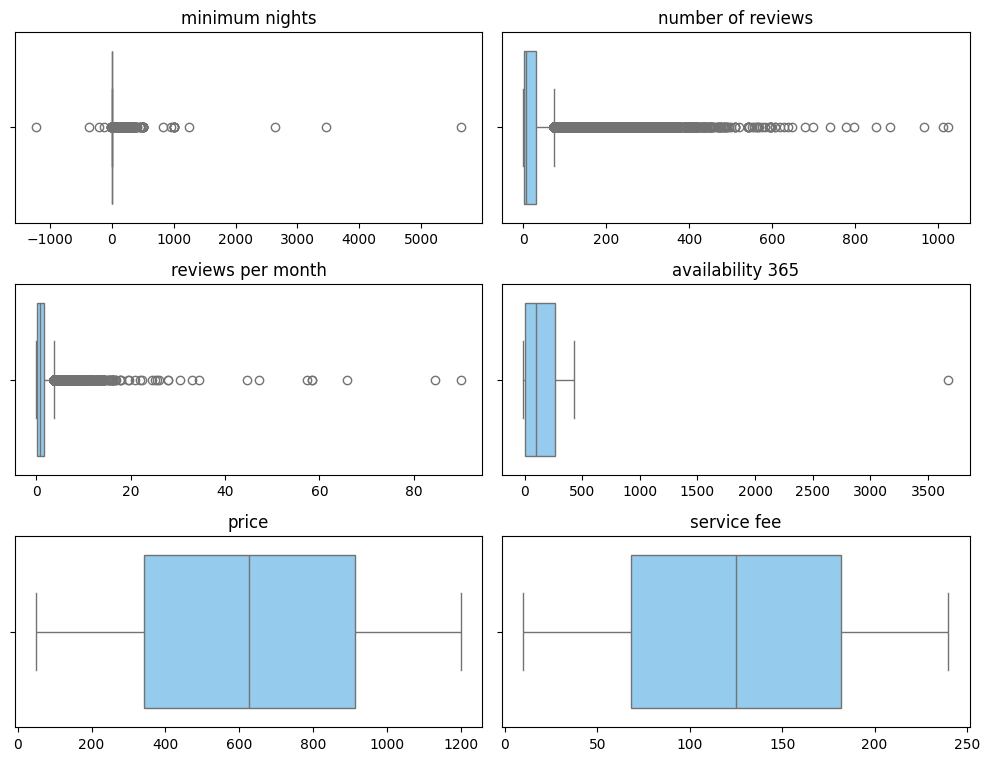

In [ ]:
cont_cols = ['minimum nights',
             'number of reviews',
             'reviews per month',
             'availability 365',
             'price',
             'service fee']

plt.figure(figsize=(10, 10))

for i, col in enumerate(cont_cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=df1, x=col, color='lightskyblue')
    plt.title(col)
    plt.xlabel("")
    plt.tight_layout()

plt.show()

The box plots before removing the outliers.

The box plots for "Price" and "Service fee" both display reasonably confined distributions free of any noticeable outliers. This may indicate a stable pricing structure in the dataset because it shows that the prices and service fees remain largely the same across listings, with minimal variance or extreme values.

we dont have outliers in columns **"price"** and **"service fee"**so we will neglect them.

In [ ]:
# Removing outliers using IQR method
Q1 = df1['minimum nights'].quantile(0.25)
Q3 = df1['minimum nights'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1['minimum nights'] >= Q1 - 1.5*IQR) & (df1['minimum nights'] <= Q3 + 1.5*IQR)]

In [ ]:
Q1 = df1['availability 365'].quantile(0.25)
Q3 = df1['availability 365'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1['availability 365'] >= Q1 - 1.5*IQR) & (df1['availability 365'] <= Q3 + 1.5*IQR)]

In [ ]:
df1['availability 365'].describe()

count    83806.000000
mean       132.176765
std        132.946050
min        -10.000000
25%          1.000000
50%         88.000000
75%        249.000000
max        426.000000
Name: availability 365, dtype: float64

In [ ]:
df1.loc[df1['availability 365'] > 365.]

neighbourhood host_identity_verified neighbourhood group  \
5             Murray Hill               verified           Manhattan   
9         Upper West Side            unconfirmed           Manhattan   
25     Bedford-Stuyvesant            unconfirmed            Brooklyn   
33             Greenpoint            unconfirmed            Brooklyn   
34                 Harlem               verified           Manhattan   
...                   ...                    ...                 ...   
86857     Upper West Side               verified           Manhattan   
86858              Harlem            unconfirmed           Manhattan   
86874     Upper West Side            unconfirmed           Manhattan   
86875        Williamsburg               verified            Brooklyn   
86879     Lower East Side               verified           Manhattan   

            lat      long  instant_bookable cancellation_policy  \
5      40.74767 -73.97500              True            flexible   
9      40.80178 -73.96723             False              strict   
25     40.68371 -73.94028             False              strict   
33     40.72219 -73.93762             False            moderate   
34     40.82130 -73.95318             False              strict   
...         ...       ...               ...                 ...   
86857  40.79415 -73.97323              True            flexible   
86858  40.81589 -73.94648              True            flexible   
86874  40.76986 -73.98673              True              strict   
86875  40.71182 -73.95692             False            moderate   
86879  40.71429 -73.98755              True            moderate   

             room type  Construction year   price  service fee  \
5      Entire home/apt             2013.0   577.0        115.0   
9         Private room             2015.0   291.0         58.0   
25     Entire home/apt             2006.0  1175.0        235.0   
33        Private room             2007.0   858.0        172.0   
34        Private room             2021.0   545.0        109.0   
...                ...                ...     ...          ...   
86857     Private room             2019.0   969.0        194.0   
86858  Entire home/apt             2003.0   749.0        150.0   
86874     Private room             2018.0   643.0        129.0   
86875      Shared room             2012.0  1139.0        228.0   
86879     Private room             2007.0   759.0        152.0   

       minimum nights  number of reviews  reviews per month  \
5                 3.0               74.0               0.59   
9                 2.0              118.0               0.99   
25                2.0               88.0               0.73   
33                4.0              197.0               1.65   
34                3.0              273.0               2.37   
...               ...                ...                ...   
86857             5.0                3.0               0.08   
86858             4.0              125.0               3.37   
86874             1.0                1.0               0.03   
86875             1.0                0.0               0.74   
86879             2.0               14.0               0.38   

       review rate number  calculated host listings count  availability 365  
5                     3.0                             1.0             374.0  
9                     5.0                             1.0             375.0  
25                    4.0                             2.0             372.0  
33                    1.0                             3.0             383.0  
34                    1.0                             3.0             411.0  
...                   ...                             ...               ...  
86857                 2.0                             1.0             380.0  
86858                 4.0                             4.0             409.0  
86874                 5.0                             1.0             383.0  
86875       

In [ ]:
df1.loc[df1['availability 365'] > 365.0, 'availability 365'] = 365.0

In [ ]:
df1.loc[df1['availability 365'] < 0.0 , 'availability 365'] = 0.0

The availability of 365 days per year has a minimum of 0 days, indicating that it is not available throughout the year, and a maximum of 365 days, indicating that it is available every day of the year.

Setting these ranges assist in the resolution of inaccuracies of misunderstood data, which may have resulted from a human error while inputting the data in.


In [ ]:
Q1 = df1['reviews per month'].quantile(0.25)
Q3 = df1['reviews per month'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1['reviews per month'] >= Q1 - 1.5*IQR) & (df1['reviews per month'] <= Q3 + 1.5*IQR)]

In [ ]:
Q1 = df1['number of reviews'].quantile(0.25)
Q3 = df1['number of reviews'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1['number of reviews'] >= Q1 - 1.5*IQR) & (df1['number of reviews'] <= Q3 + 1.5*IQR)]

In [ ]:
df1['availability 365'].describe()

count    70728.000000
mean       124.748600
std        132.430148
min          0.000000
25%          0.000000
50%         76.000000
75%        242.000000
max        365.000000
Name: availability 365, dtype: float64

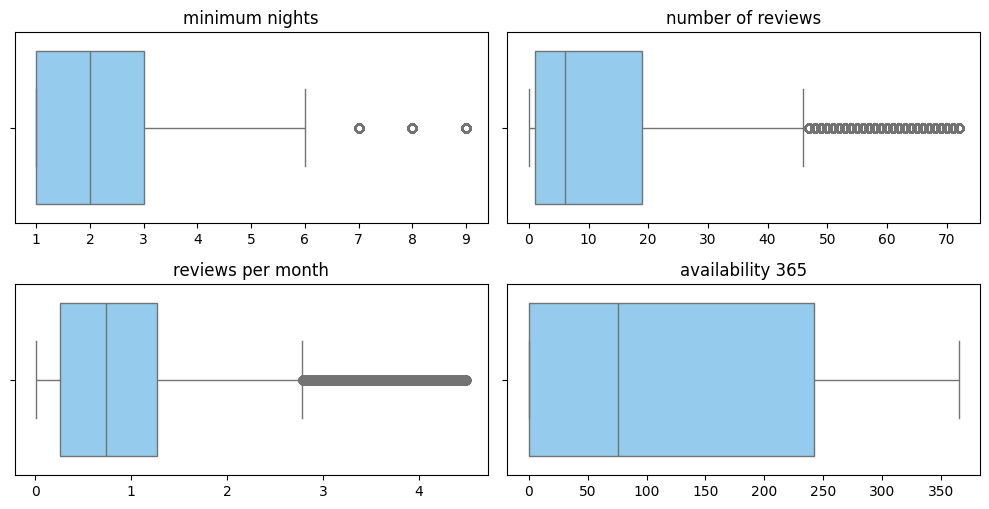

In [ ]:
cont_cols = ['minimum nights',
             'number of reviews',
             'reviews per month',
             'availability 365']

plt.figure(figsize=(10, 10))

for i, col in enumerate(cont_cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=df1, x=col, color='lightskyblue')
    plt.title(col)
    plt.xlabel("")
    plt.tight_layout()

plt.show()

The box plots representation after deleting the outliers.

Although there have been numerous outliers in our dataset, we are unable to remove all of them because they carry significant information.

Each of these four columns are the only ones that include undesired outliers.


**Save final cleaned dataset**

In [ ]:
#df1.to_csv("cleaned_AB_NYC.csv")

# **VISUALIZING DATA AND FINDING CORRELATION**

*   Visualize data
*   encode categorical features
*   Finding Correlation and drop unwanted features





1- Visualize data

In [ ]:
df1.columns

Index(['neighbourhood', 'host_identity_verified', 'neighbourhood group', 'lat',
       'long', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')

In [ ]:
fig = px.scatter_mapbox(df1, lat='lat',
                        lon='long',
                        hover_name='room type',color = 'price', hover_data=['neighbourhood'],
                        zoom=10, height=800, width=1000,size_max=20,color_continuous_scale='twilight' )
fig.update_layout(
    mapbox_style="open-street-map" )
fig.show()

The map indicates that the city and its neighbourhoods have a fairly uniform price distribution, making it tough to pinpoint the most costly areas.
Prices are typically higher in central, easily accessible locations.

This implies that location and room type have a big impact on listing prices.

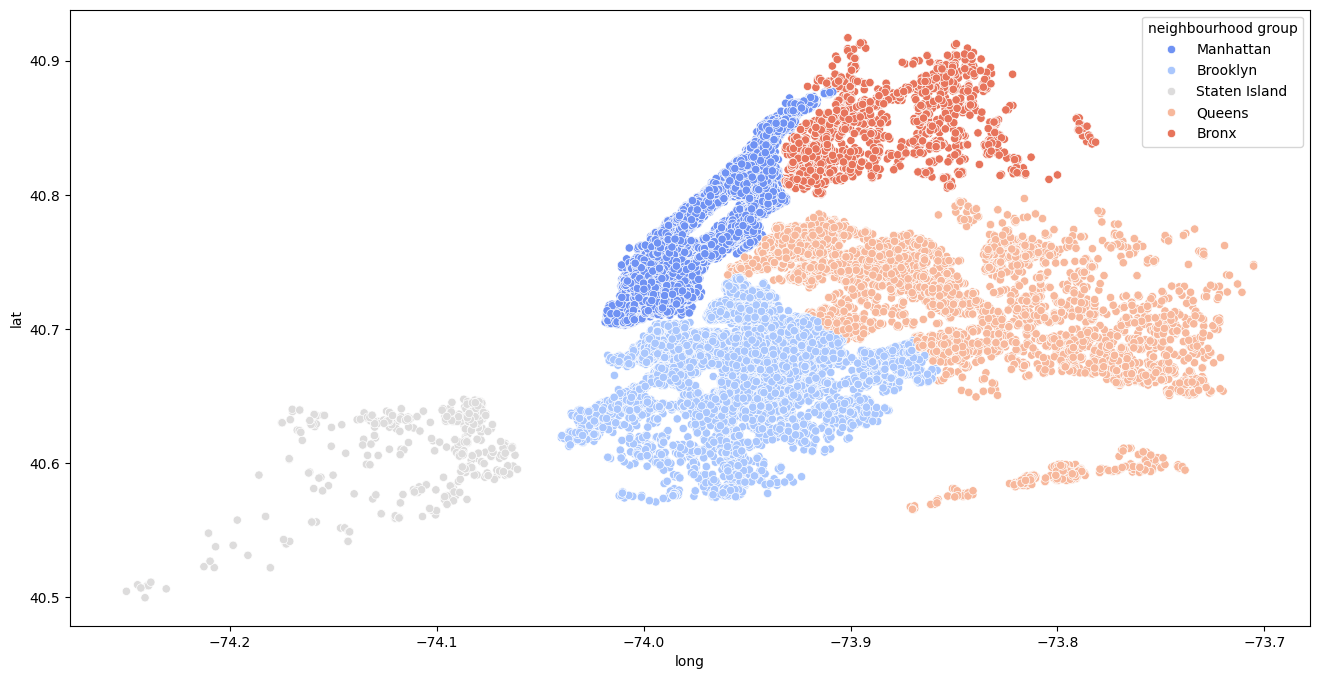

In [ ]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df1['lat'], x=df1['long'], hue=df1['neighbourhood group'] ,palette="coolwarm")
plt.show()

The data points are color-coded by "neighbourhood group", which represents the five main neighborhoods: Manhattan, Brooklyn, Queens, the Bronx, and Staten Island.

**Manhattan** has the largest number of listings, particularly in the downtown areas such as Midtown and Lower Manhattan, reflecting its status as a thriving hub for tourism and businesses.

**Brooklyn** follows with a substantial number of listings, notably in neighbourhoods like as Williamsburg and Downtown Brooklyn, which offer a mixture of hometown charm and tourist attraction.

**Queens** has a more scattered trend, with clusters around transportation hubs such as LaGuardia and JFK airports, catering to travellers looking for a cheaper accommodation than Manhattan.

The **Bronx**, while less crowded, has concentrations closer to Manhattan, indicating a desire for access to the city center.

**Staten Island** had the fewest and most distributed listings, indicating a suburban style and a lesser demand for short-term rentals.


<ipython-input-78-86124118a6f9>:3: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



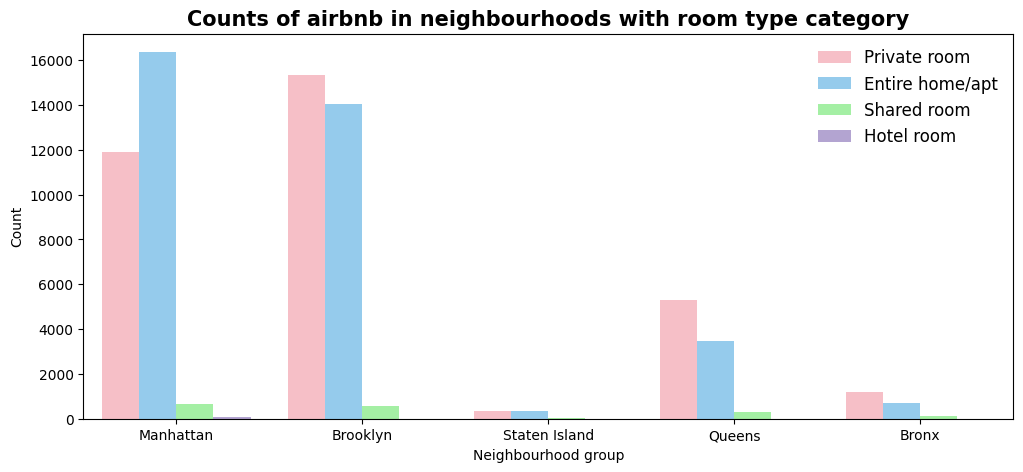

In [ ]:
plt.figure(figsize=(12,5))

sns.countplot(data=df1, x='neighbourhood group', hue='room type', palette=pastel_colors)

plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15,fontweight='bold')
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")

plt.legend(frameon=False, fontsize=12)

The distribution of Airbnb listings by room type across New York City neighbourhoods is shown in this bar chart.

Manhattan and Brooklyn dominate the market, with most listings being "Entire home/apartment" or "Private room," reflecting the high demand in these areas. The Bronx and Staten Island have the fewest listings, while Queens has a respectable amount. In most neighbourhoods, "shared room" and "hotel room" types are uncommon. According to the research, Queens, the Bronx, and Staten Island are more appealing to tourists on a tight budget, whereas Manhattan and Brooklyn serve vacationers looking for solitude.

This demonstrates how geography and traveller preferences affect the dynamics of the NYC Airbnb market.

In [ ]:
m = folium.Map([40.7128,-74.0060],zoom_start=9, width='100%', height='70%')

HeatMap(df1[['lat','long']].dropna(),radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)

display(m)

We are able to locate our positional data far better by zooming out on the US geographical heatmap. The heatmap indicates that the Airbnb listings in our dataset are specifically located in New York City.



In [ ]:
#sns.pairplot(df1, palette="coolwarm")

Pairwise scatterplots for each and every numerical column in the dataset.

 2- encode categorical features

 To find the correleration we must:- change the categorical columns to numerical, to do that, we used Label encoding.

In [ ]:
from sklearn import preprocessing

# Encode categorical columns to numerical using Label Encoding

lb_en_1 = preprocessing.LabelEncoder()
lb_en_1.fit(df1['neighbourhood group'])
df1['neighbourhood group'] = list(lb_en_1.transform(df1['neighbourhood group']))

lb_en_2 = preprocessing.LabelEncoder()
lb_en_2.fit(df1['neighbourhood'])
df1['neighbourhood'] = list(lb_en_2.transform(df1['neighbourhood']))

lb_en_3 = preprocessing.LabelEncoder()
lb_en_3.fit(df1['room type'])
df1['room type'] = list(lb_en_3.transform(df1['room type']))

lb_en_4 = preprocessing.LabelEncoder()
lb_en_4.fit(df1['host_identity_verified'])
df1['host_identity_verified'] = list(lb_en_4.transform(df1['host_identity_verified']))

lb_en_5 = preprocessing.LabelEncoder()
lb_en_5.fit(df1['instant_bookable'])
df1['instant_bookable'] = list(lb_en_5.transform(df1['instant_bookable']))

lb_en_6 = preprocessing.LabelEncoder()
lb_en_6.fit(df1['cancellation_policy'])
df1['cancellation_policy'] = list(lb_en_6.transform(df1['cancellation_policy']))

In [ ]:
df1

neighbourhood  host_identity_verified  neighbourhood group       lat  \
2                  96                       0                    2  40.80902   
11                204                       1                    2  40.80316   
19                 52                       0                    1  40.67592   
20                 62                       1                    2  40.79685   
21                216                       1                    1  40.71842   
...               ...                     ...                  ...       ...   
102053             74                       0                    1  40.64945   
102054             28                       1                    1  40.69872   
102055             13                       1                    1  40.67810   
102056             96                       0                    2  40.81248   
102057             96                       1                    2  40.81315   

            long  instant_bookable  cancellation_policy  room type  \
2      -73.94190                 1                    0          2   
11     -73.96545                 1                    0          0   
19     -73.94694                 0                    1          0   
20     -73.94872                 0                    1          0   
21     -73.95718                 0                    0          0   
...          ...               ...                  ...        ...   
102053 -73.96108                 1                    1          2   
102054 -73.92718                 0                    0          2   
102055 -73.90822                 1                    1          0   
102056 -73.94317                 1                    2          2   
102057 -73.94747                 0                    0          0   

        Construction year   price  service fee  minimum nights  \
2                  2005.0   620.0        124.0             3.0   
11                 2008.0   606.0        121.0             5.0   
19                 2004.0  1095.0        125.0             3.0   
20                 2013.0   281.0         56.0             7.0   
21                 2016.0   477.0         95.0             3.0   
...                   ...     ...          ...             ...   
102053             2012.0   696.0        125.0             7.0   
102054             2012.0   909.0        125.0             1.0   
102055             2012.0   387.0        125.0             2.0   
102056             2012.0   848.0        125.0             2.0   
102057             2011.0  1128.0        125.0             4.0   

        number of reviews  reviews per month  review rate number  \
2                     0.0               0.74                 5.0   
11                   53.0               0.43                 4.0   
19                   53.0               4.44                 5.0   
20                    0.0               0.74                 3.0   
21                    9.0               0.07                 3.0   
...                   ...                ...                 ...   
102053               12.0               0.44                 5.0   
102054               19.0               0.72                 3.0   
102055               50.0               3.12                 4.0   
102056                0.0               0.74                 1.0   
102057               22.0               0.85                 4.0   

        calculated host listings count  availability 365  
2                                  1.0             352.0  
11                                 1.0             163.0  
19                                 1.0             345.0  
20                                 2.0             347.0  
21                                 1.0             193.0  
...                                ...               ...  
102053                             1.0               0.0  
102054                             2.0               0.0  
102055                             2.0             235.0  
102056

3- Finding Correlation and drop unwanted features

Correlation between price and service fee: 0.9980808523368757


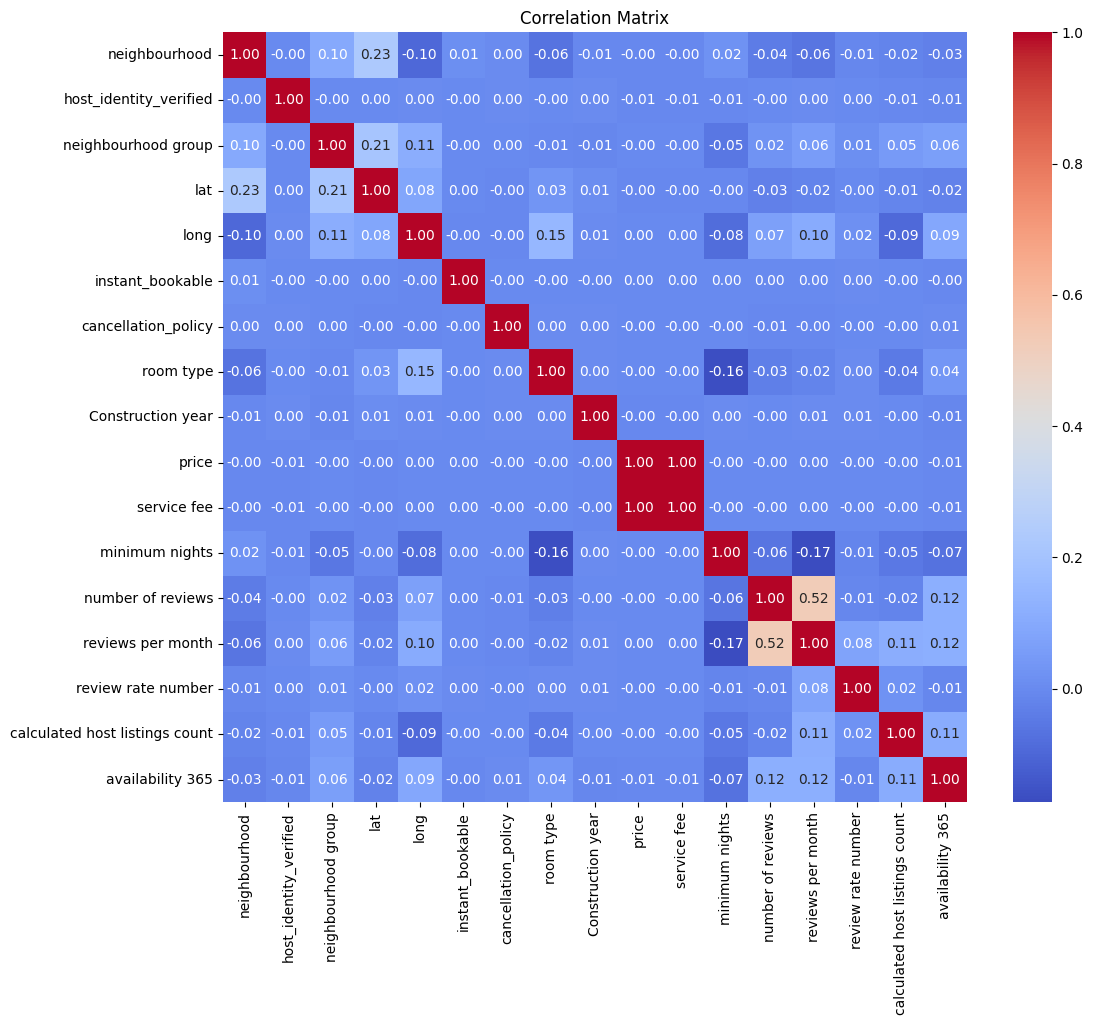

In [ ]:
cm = df1.select_dtypes(include=np.number).corr()
#print(f"Correlation between price and number of reviews: {cm.loc['price', 'number of reviews']}")
#print(f"Correlation between price and availability 365: {cm.loc['price', 'availability 365']}")
print(f"Correlation between price and service fee: {cm.loc['price', 'service fee']}")

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**annot=True**: Displays the correlation values in each cell of the heatmap. The numbers help interpret the exact correlation values

We now look at a correlation plot among the numerical variables. We don't see any strong correlations between meaningful variables, except "number of reviews" vs "reviews per month" and The "price" and "service fee" are almost perfectly correlated (correlation ≈ 0.998), indicating that listings with higher prices often come with a proportionally higher service fee, it's best to drop one of them. Including both in a model will most likely create redundancy without generating helpful information.


In [ ]:
df1.drop(['service fee'], axis=1)

neighbourhood  host_identity_verified  neighbourhood group       lat  \
2                  96                       0                    2  40.80902   
11                204                       1                    2  40.80316   
19                 52                       0                    1  40.67592   
20                 62                       1                    2  40.79685   
21                216                       1                    1  40.71842   
...               ...                     ...                  ...       ...   
102053             74                       0                    1  40.64945   
102054             28                       1                    1  40.69872   
102055             13                       1                    1  40.67810   
102056             96                       0                    2  40.81248   
102057             96                       1                    2  40.81315   

            long  instant_bookable  cancellation_policy  room type  \
2      -73.94190                 1                    0          2   
11     -73.96545                 1                    0          0   
19     -73.94694                 0                    1          0   
20     -73.94872                 0                    1          0   
21     -73.95718                 0                    0          0   
...          ...               ...                  ...        ...   
102053 -73.96108                 1                    1          2   
102054 -73.92718                 0                    0          2   
102055 -73.90822                 1                    1          0   
102056 -73.94317                 1                    2          2   
102057 -73.94747                 0                    0          0   

        Construction year   price  minimum nights  number of reviews  \
2                  2005.0   620.0             3.0                0.0   
11                 2008.0   606.0             5.0               53.0   
19                 2004.0  1095.0             3.0               53.0   
20                 2013.0   281.0             7.0                0.0   
21                 2016.0   477.0             3.0                9.0   
...                   ...     ...             ...                ...   
102053             2012.0   696.0             7.0               12.0   
102054             2012.0   909.0             1.0               19.0   
102055             2012.0   387.0             2.0               50.0   
102056             2012.0   848.0             2.0                0.0   
102057             2011.0  1128.0             4.0               22.0   

        reviews per month  review rate number  calculated host listings count  \
2                    0.74                 5.0                             1.0   
11                   0.43                 4.0                             1.0   
19                   4.44                 5.0                             1.0   
20                   0.74                 3.0                             2.0   
21                   0.07                 3.0                             1.0   
...                   ...                 ...                             ...   
102053               0.44                 5.0                             1.0   
102054               0.72                 3.0                             2.0   
102055               3.12                 4.0                             2.0   
102056               0.74                 1.0                             1.0   
102057               0.85                 4.0                             1.0   

        availability 365  
2                  352.0  
11                 163.0  
19                 345.0  
20                 347.0  
21                 193.0  
...                  ...  
102053               0.0  
102054               0.0  
102055             235.0  
102056               0.0  
102057             238.0  

[70728 rows x 16 columns]

# **DATA MODELLING**

*   Feature scaling
*   ANN regression model





1- Feature scaling

In [ ]:
y = df1['price'].copy()
X = df1.drop('price', axis=1).copy()

We need to divide it into train and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling features to enhance training.
by Standardization and also known as Z-score normalization, it centers the data around 0 and scales it based on standard deviation.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2- Build an ANN regression model

In [ ]:
def regression_accuracy(y_true, y_pred):
    tolerance = 0.1  # Define tolerance as 10% of actual value
    relative_error = K.abs((y_true - y_pred) / y_true)
    accurate_predictions = K.less_equal(relative_error, tolerance)  # Check if within tolerance
    return K.mean(K.cast(accurate_predictions, K.floatx()))  # Average accuracy within tolerance


In [ ]:
model = Sequential()

model.add(Dense(64, input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))

model.add(Dense(1))  # Output layer for regression

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



X_train.shape[1] indicates the number of features in the training dataset.


**Elastic Net regularization** = λ1 * Σ|wi| + λ2 * Σ(wi^2)

In [ ]:
model.compile(optimizer='Adam', loss='mae', metrics=[regression_accuracy])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

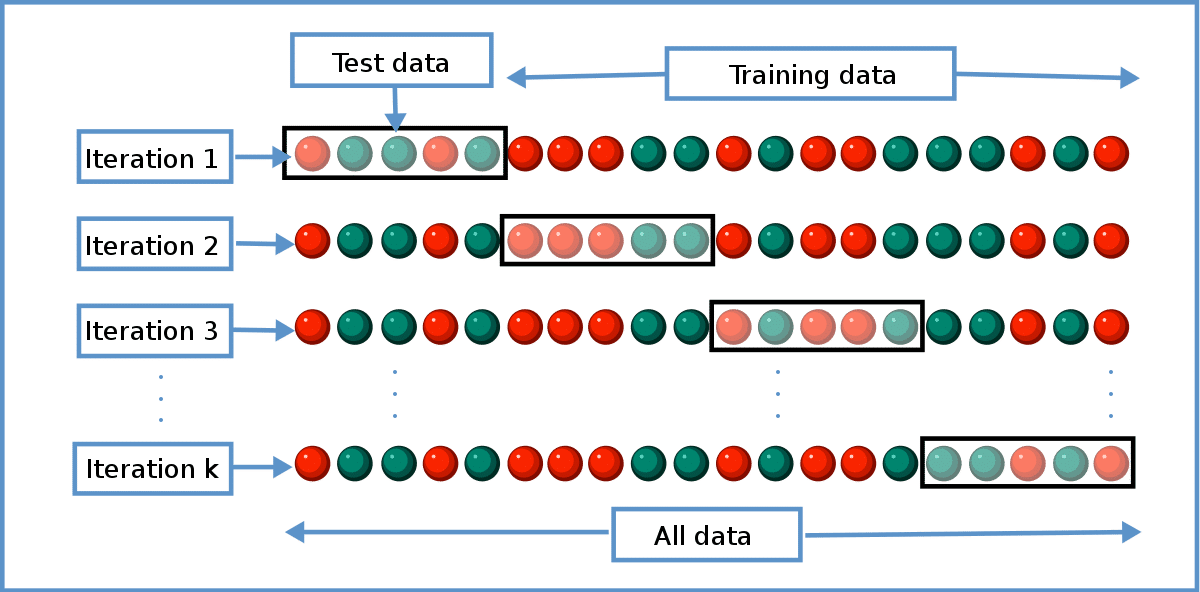

In [ ]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=65,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 297.5426 - regression_accuracy: 0.3594 - val_loss: 22.8378 - val_regression_accuracy: 0.9533
Epoch 2/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 20.4179 - regression_accuracy: 0.9648 - val_loss: 17.3913 - val_regression_accuracy: 0.9789
Epoch 3/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16.5602 - regression_accuracy: 0.9812 - val_loss: 15.6424 - val_regression_accuracy: 0.9858
Epoch 4/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 14.6040 - regression_accuracy: 0.9886 - val_loss: 14.3196 - val_regression_accuracy: 0.9903
Epoch 5/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13.7688 - regression_accuracy: 0.9906 - val_loss: 13.1044 - val_regression_accuracy: 0.9902
Epoch 6/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 12.9522 - regression_accuracy: 0.9927 - val_loss: 13.5873 - val_regression_accuracy: 0.9934
Epoch 7/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 12.3409 - regression

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,333 (231.77 KB)

 Trainable params: 19,777 (77.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,556 (154.52 KB)

In [ ]:
# Evaluate the model
test_loss, test_regression_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Regression Accuracy (within ±10% tolerance): {test_regression_accuracy:.2f}")

Test Regression Accuracy (within ±10% tolerance): 1.00


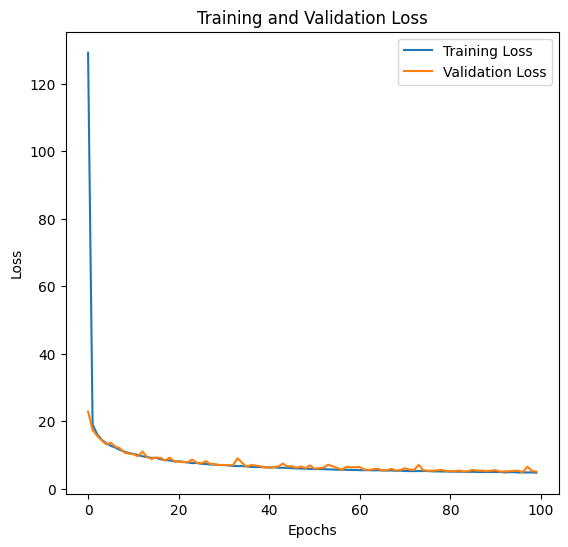

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['regression_accuracy']
val_accuracy = history.history['val_regression_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

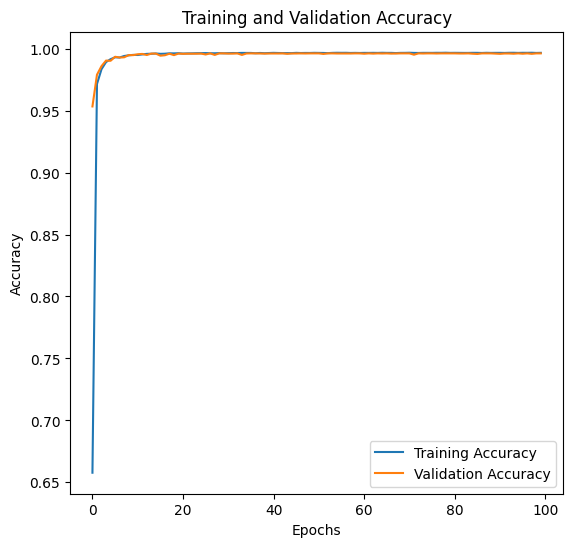

In [ ]:
# Plotting training and validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.0164 - regression_accuracy: 0.9960
Test Loss: 4.772634029388428
Test Accuracy: 0.9964728951454163


443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


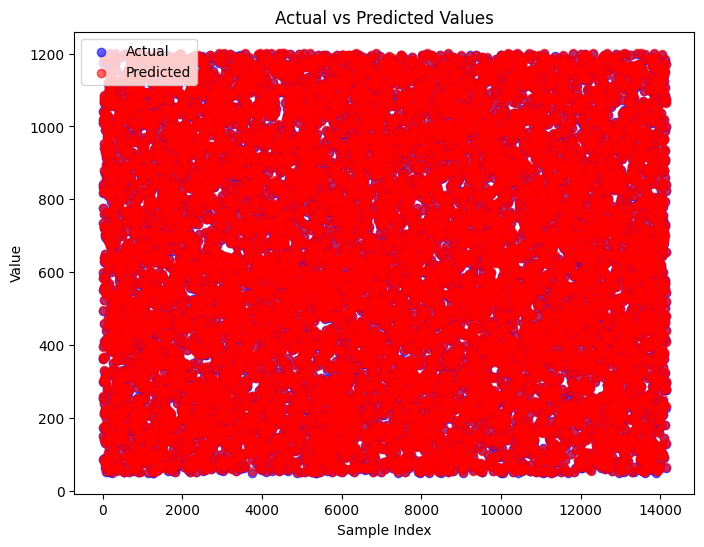

In [ ]:

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual", color="blue", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", color="red", alpha=0.6)
plt.title("Actual vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.show()


This graph reflects the excellence of the model in doing the actual and predicting correct values. This proximity of the values of the predicted to actual values basically means that this model captures the underlying pattern in the data very well.

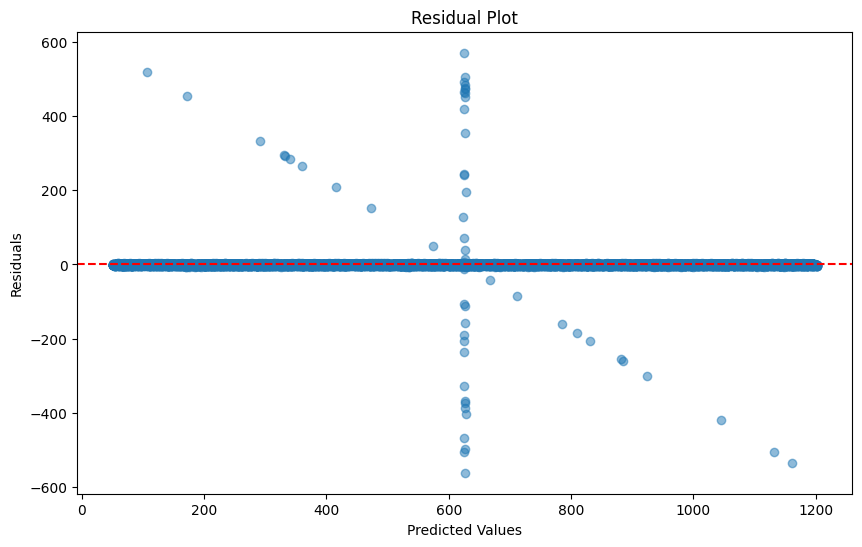

In [ ]:
residuals = y_test - y_pred.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


A residual plot, which is a graphical representation of the residuals (the differences between the observed values and the predicted values) of a regression model. In this case, the residual plot is displayed with the predicted values on the x-axis and the residuals on the y-axis.

The plot is scattered about the horizontal line at y = 0, as it should be for a model that fits well. The residuals do not display any real obvious pattern and appear to be randomly placed, suggesting the model should be appropriate to describe the variation in this set of data.

Another desirable characteristic of the distribution of the residuals is that they are roughly symmetric around the y = 0 line because it would tend to support the assumptions of linearity  (constant variance).

**Save & load the model**

In [ ]:
model.save('our_model.h5')

It is necessary to save the model in order to preserve your training results. You may avoid retraining a model from scratch whenever you need to use it, which can be time-consuming and demanding of resources, by saving it once it has been trained. The learned weights, architecture, and optimizer state are then preserved when the stored model is loaded for inference or additional training.

In summary, saving the model makes installation and future usage easier, guarantees efficiency, and prevents any data loss.

In [ ]:
# Load the saved model
#loaded_model = load_model("our_model.h5")



---


# **Conclusion**

The project aimed to analyze Airbnb listings in New York City, with the goal of building a predictive model to estimate listing prices based on various factors. We studied the connection between pricing trends and listing aspects, such as host verification status, room type, and neighbourhood, using a sequential neural network. In order to make sure the model would be constructed on a strong foundation, we conducted an intensive data profiling and pre-processing effort throughout the process to address problems with missing values, inconsistent data types, and anomalies.




The project's **key findings** involve identifying key factors that impact Airbnb pricing, such as neighbourhood, room type, and host verification status. The dataset, which were having 102,599 records, presented a rich source of information that resulted in a useful insight into pricing trends. Data cleaning was an important stage since it involved handling missing data, removing duplicate, all of which were required to ensure that our research was reliable and accurate.


We applied an Artificial Neural Network (ANN) regression technique to forecast listing prices. The model showcased the power of machine learning in capturing complicated correlations between listing information and prices, demonstrating how AI can be applied to resolve real-world pricing challenges.

Looking ahead, there are many potential fields for future research to enhance the model's performance and predictive abilities. Integrating more datasets, performing extra feature engineering, and experimenting with different machine learning models might improve price prediction accuracy. Furthermore, investigating dynamic pricing models which factor in for seasonality might deliver an improved approach to price prediction.


In conclusion, this research underlines data analytics' significant potential in the hotel industry. These sorts of assessments can provide insights for Airbnb hosts and property managers, allowing them to optimize pricing strategies and increase operational efficiency. It can help guests learn about price variations and make wiser booking decisions. As the tourism and short-term rental markets evolve, using data science and machine learning approaches will be critical for both businesses and visitors to improve the whole experience and drive better, more data-driven decisions.

